In [1]:
# Importing all required packages and ignore warnings 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from IPython.display import Markdown, display
from sklearn.cluster import KMeans
import warnings
import time
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
pd.options.display.max_colwidth = 100

## Loading the all cleaned data

In [2]:
review_df_final = pd.read_csv("reviews_dataset_new.csv")
review_df_final.shape

(437511, 23)

In [3]:
review_df_final.describe()

,OverallCompanyRating,Verified,TotalEmployees,year,quarter,month,CareerGrowth,SalaryandBenefits,WorkLifeBalance,WorkSatisfaction,CompanyCulture,SkillDevelopment,JobSecurity,Fortune500,Global2000,MNC,conglomerate,Govt,ReviewText_CharCount,ReviewText_WordCount,firm_noofreviews,fake
count,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.000000,437511.00000,437511.000000,437511.000000,437511.000000
mean,3.931188,0.653874,45446.461028,2019.149900,2.441047,6.348885,3.468500,3.463113,3.646425,3.572408,3.757437,3.838639,3.774726,0.454423,0.447902,0.230081,0.131178,0.007678,75.59487,10.678952,2628.634297,0.159358
std,1.271973,0.475735,42668.302325,1.231958,1.055123,3.207277,1.411988,1.373754,1.360261,1.414131,1.363665,1.287282,1.397113,0.497919,0.497279,0.420885,0.337596,0.087285,88.99588,12.526941,3193.627381,0.366010
min,0.000000,0.000000,201.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,5.000000,0.000000
25%,3.000000,0.000000,10001.000000,2018.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.00000,4.000000,468.000000,0.000000
50%,4.000000,1.000000,10001.000000,2019.000000,2.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.00000,7.000000,1027.000000,0.000000
75%,5.000000,1.000000,100001.000000,2020.000000,3.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,90.00000,13.000000,4025.000000,0.000000
max,5.000000,1.000000,100001.000000,2021.000000,4.000000,12.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2497.00000,363.000000,13098.000000,1.000000


In [4]:
review_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437511 entries, 0 to 437510
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   OverallCompanyRating  437511 non-null  int64 
 1   Verified              437511 non-null  int64 
 2   TotalEmployees        437511 non-null  int64 
 3   year                  437511 non-null  int64 
 4   quarter               437511 non-null  int64 
 5   month                 437511 non-null  int64 
 6   CareerGrowth          437511 non-null  int64 
 7   SalaryandBenefits     437511 non-null  int64 
 8   WorkLifeBalance       437511 non-null  int64 
 9   WorkSatisfaction      437511 non-null  int64 
 10  CompanyCulture        437511 non-null  int64 
 11  SkillDevelopment      437511 non-null  int64 
 12  JobSecurity           437511 non-null  int64 
 13  Fortune500            437511 non-null  int64 
 14  Global2000            437511 non-null  int64 
 15  MNC              

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,1), min_df = 0.1) 
 
# vectorize the complete text
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(review_df_final['ReviewText'])


In [6]:
(tfidf_vectorizer_vectors)

<437511x12 sparse matrix of type '<class 'numpy.float64'>'
	with 939107 stored elements in Compressed Sparse Row format>

In [7]:
review_df_final.head(2)

,OverallCompanyRating,Verified,TotalEmployees,year,quarter,month,CareerGrowth,SalaryandBenefits,WorkLifeBalance,WorkSatisfaction,CompanyCulture,SkillDevelopment,JobSecurity,Fortune500,Global2000,MNC,conglomerate,Govt,ReviewText,ReviewText_CharCount,ReviewText_WordCount,firm_noofreviews,fake
0,1,0,100001,2021,3,9,1,2,1,1,1,1,1,0,0,1,0,0,work life balance treat employee slaves set un realistic goal achieve either work hrs make alot ...,497,76,599,1
1,5,1,100001,2021,1,2,5,5,5,5,5,5,5,0,0,1,0,0,good work environment culture teammates supportive management transparent huge cafeteria gaming ...,316,44,599,0


In [8]:
# Putting feature variable to X
X = tfidf_vectorizer_vectors

# Putting response variable to y
y = review_df_final["fake"]

In [9]:
wcss = []
st = time.process_time()
for i in range(1, 50):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init=10,random_state=0,verbose=True)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
et = time.process_time()
res = et - st
print('CPU Execution time for optimal K:', res, 'seconds')

Initialization complete
Iteration 0, inertia 658099.98599283.
Iteration 1, inertia 303227.9199583463.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 638099.1557247036.
Iteration 1, inertia 303227.9199583463.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 750153.4094880323.
Iteration 1, inertia 303227.91995834623.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 627719.5202485018.
Iteration 1, inertia 303227.9199583463.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 580793.9860895223.
Iteration 1, inertia 303227.9199583463.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 558607.0276548327.
Iteration 1, inertia 303227.9199583463.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 681123.8123701196.
Iteration 1, inertia 303227.919958346

Iteration 0, inertia 321718.4261081636
Iteration 1, inertia 245482.59659031394
Iteration 2, inertia 241689.48199799785
Iteration 3, inertia 238995.1355234795
Iteration 4, inertia 236655.15615085314
Iteration 5, inertia 234183.6970702844
Iteration 6, inertia 234145.11950619862
Iteration 7, inertia 234141.5382606708
Converged at iteration 7: center shift 4.036450753401953e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 328204.6616588003
Iteration 1, inertia 254112.35961976793
Iteration 2, inertia 252031.2464121232
Iteration 3, inertia 251480.22555772477
Iteration 4, inertia 251396.79807325965
Iteration 5, inertia 251387.77271025238
Iteration 6, inertia 251368.33665303167
Iteration 7, inertia 251358.51231626316
Iteration 8, inertia 251354.7151670611
Iteration 9, inertia 251353.64738145383
Iteration 10, inertia 251351.83716463394
Converged at iteration 10: center shift 1.997492320142474e-06 within tolerance 5.775624688261689e-06.
Initialization comp

Iteration 3, inertia 187474.51616726982
Iteration 4, inertia 187369.24130734024
Iteration 5, inertia 187328.01795751147
Iteration 6, inertia 187253.12687627436
Iteration 7, inertia 187233.67500969555
Iteration 8, inertia 187227.5028293406
Iteration 9, inertia 187222.660155056
Iteration 10, inertia 187220.6372703416
Iteration 11, inertia 187217.74972145306
Iteration 12, inertia 187146.50860688149
Iteration 13, inertia 187145.32048460888
Converged at iteration 13: center shift 4.601728018028987e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 265642.88117961667
Iteration 1, inertia 196226.37299716676
Iteration 2, inertia 188442.48416024295
Iteration 3, inertia 187649.33376581362
Iteration 4, inertia 187204.1602122315
Iteration 5, inertia 187148.03872545558
Iteration 6, inertia 187138.1264706233
Iteration 7, inertia 187133.17236574
Converged at iteration 7: center shift 5.054055017178531e-06 within tolerance 5.775624688261689e-06.
Initialization com

Iteration 0, inertia 250262.31401678338
Iteration 1, inertia 196443.14880991713
Iteration 2, inertia 189577.59197177214
Iteration 3, inertia 186908.5595204067
Iteration 4, inertia 183477.15521489317
Iteration 5, inertia 183370.7883949685
Iteration 6, inertia 183322.2614350355
Iteration 7, inertia 183292.0065711273
Iteration 8, inertia 183129.2298497288
Iteration 9, inertia 181871.88826507734
Iteration 10, inertia 180453.5866024996
Iteration 11, inertia 180047.02196587436
Iteration 12, inertia 180027.3020994738
Iteration 13, inertia 180024.66945291217
Converged at iteration 13: center shift 4.819546198270432e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 231696.41082378145
Iteration 1, inertia 163957.72218585963
Iteration 2, inertia 158373.77582459955
Iteration 3, inertia 157317.90462255114
Iteration 4, inertia 157109.3801194665
Iteration 5, inertia 157096.1458785525
Converged at iteration 5: center shift 5.364812808243241e-06 within tolerance 5

Iteration 5, inertia 142178.37366727932
Iteration 6, inertia 142131.90120700363
Iteration 7, inertia 142124.6226787028
Iteration 8, inertia 142124.16511698338
Converged at iteration 8: center shift 3.94541435988845e-08 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 215949.76630501228
Iteration 1, inertia 155173.20533111284
Iteration 2, inertia 145296.7228367051
Iteration 3, inertia 143096.23034424853
Iteration 4, inertia 142568.09703186643
Iteration 5, inertia 142537.2444385992
Iteration 6, inertia 142533.83517018543
Converged at iteration 6: center shift 1.6927336217559873e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 219999.26156970588
Iteration 1, inertia 162831.5944388851
Iteration 2, inertia 156298.49949312498
Iteration 3, inertia 151105.49793667454
Iteration 4, inertia 149943.7981584295
Iteration 5, inertia 149918.93069553288
Iteration 6, inertia 149912.22694842378
Iteration 7, inertia 149907.3170188

Initialization complete
Iteration 0, inertia 169980.29719450715
Iteration 1, inertia 131205.85950948234
Iteration 2, inertia 127990.45157780944
Iteration 3, inertia 126806.00799785933
Iteration 4, inertia 125973.5721510809
Iteration 5, inertia 125554.84712477072
Iteration 6, inertia 125443.77874353339
Iteration 7, inertia 125437.12772990065
Iteration 8, inertia 125436.6859010919
Converged at iteration 8: center shift 4.5607216016149804e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 174203.0906308146
Iteration 1, inertia 134004.76326960928
Iteration 2, inertia 131980.5729545034
Iteration 3, inertia 130842.9758081861
Iteration 4, inertia 130292.63988450015
Iteration 5, inertia 130251.9943307376
Iteration 6, inertia 130229.28397764408
Iteration 7, inertia 130227.5939254513
Converged at iteration 7: center shift 1.3390164292647048e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 189459.85310658382
Iteration 1

Iteration 6, inertia 105662.58510311782
Iteration 7, inertia 105400.98139005023
Iteration 8, inertia 105368.10813819006
Iteration 9, inertia 105331.70195537718
Iteration 10, inertia 105331.0342222612
Converged at iteration 10: center shift 1.4120714800708063e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 179518.73788778024
Iteration 1, inertia 112738.01998520359
Iteration 2, inertia 105671.5474158406
Iteration 3, inertia 104854.74411165122
Iteration 4, inertia 104405.81321417986
Iteration 5, inertia 104117.3216093396
Iteration 6, inertia 104074.70110708577
Iteration 7, inertia 104052.98083256175
Iteration 8, inertia 104049.38145724015
Iteration 9, inertia 104043.72737316243
Iteration 10, inertia 104038.55174245014
Converged at iteration 10: center shift 4.325388711675975e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 147185.57255723357
Iteration 1, inertia 107702.94828585535
Iteration 2, inertia 105788.

Iteration 3, inertia 98198.62900356037
Iteration 4, inertia 97305.94379532343
Iteration 5, inertia 97097.92861143466
Iteration 6, inertia 97048.63275968238
Iteration 7, inertia 97034.80183645619
Iteration 8, inertia 97033.1625385714
Iteration 9, inertia 97032.89419167444
Converged at iteration 9: center shift 8.97406644598732e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 159308.4659237335
Iteration 1, inertia 107686.93591224635
Iteration 2, inertia 98528.5018886796
Iteration 3, inertia 97574.22710199139
Iteration 4, inertia 97428.03738972056
Iteration 5, inertia 97342.26944760887
Iteration 6, inertia 97236.65518658391
Iteration 7, inertia 97173.00896605676
Iteration 8, inertia 97059.61161874046
Iteration 9, inertia 96965.694689505
Iteration 10, inertia 96889.3746252213
Iteration 11, inertia 96794.74053751331
Iteration 12, inertia 96762.10380668954
Iteration 13, inertia 96752.48975198854
Iteration 14, inertia 96751.42497354405
Converged at iter

Iteration 3, inertia 96956.22621831406
Iteration 4, inertia 96892.78164511427
Iteration 5, inertia 96834.32109779037
Iteration 6, inertia 96782.17382852707
Iteration 7, inertia 96730.18344593904
Iteration 8, inertia 96652.64389693376
Iteration 9, inertia 96633.73606765323
Iteration 10, inertia 96626.31669712366
Iteration 11, inertia 96621.79758974387
Iteration 12, inertia 96619.58118741956
Iteration 13, inertia 96617.0447874322
Converged at iteration 13: center shift 2.7746094950332692e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 146390.34731813837
Iteration 1, inertia 105588.85650882396
Iteration 2, inertia 101944.77780181699
Iteration 3, inertia 99424.19603961037
Iteration 4, inertia 99276.29486552518
Iteration 5, inertia 99248.27698635127
Iteration 6, inertia 99246.60842410562
Iteration 7, inertia 99246.18580362847
Iteration 8, inertia 99245.96071202279
Converged at iteration 8: center shift 4.679991742957184e-06 within tolerance 5.7756246

Iteration 3, inertia 92572.52091319684
Iteration 4, inertia 92185.29116896933
Iteration 5, inertia 92042.14217754008
Iteration 6, inertia 92000.90388329979
Iteration 7, inertia 91976.230579456
Iteration 8, inertia 91973.22345638528
Iteration 9, inertia 91973.07001736955
Converged at iteration 9: center shift 8.051686120431375e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 135739.16686661378
Iteration 1, inertia 98730.19849393796
Iteration 2, inertia 97057.1665065529
Iteration 3, inertia 96727.55261614689
Iteration 4, inertia 96680.67063336991
Iteration 5, inertia 96674.06026808484
Iteration 6, inertia 96670.08227676342
Converged at iteration 6: center shift 2.3717022035051655e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 134277.49132101878
Iteration 1, inertia 100845.25928822173
Iteration 2, inertia 98194.90078483966
Iteration 3, inertia 92246.15722710031
Iteration 4, inertia 90935.12207765368
Iteratio

Iteration 15, inertia 84928.79040115725
Iteration 16, inertia 84918.92816140827
Iteration 17, inertia 84910.38651481469
Iteration 18, inertia 84885.21341469808
Iteration 19, inertia 84884.85219775495
Converged at iteration 19: center shift 6.576301536113621e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 123873.10245563772
Iteration 1, inertia 89510.42004085056
Iteration 2, inertia 87600.59748451728
Iteration 3, inertia 87120.33874962766
Iteration 4, inertia 86916.16444830268
Iteration 5, inertia 86851.86694993314
Iteration 6, inertia 86846.5854409813
Iteration 7, inertia 86846.13760348014
Converged at iteration 7: center shift 5.212486909379993e-08 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 132240.1873201047
Iteration 1, inertia 95183.20164216505
Iteration 2, inertia 90160.19683961016
Iteration 3, inertia 89309.1392653425
Iteration 4, inertia 88855.80702373304
Iteration 5, inertia 88551.35625337219
Iter

Initialization complete
Iteration 0, inertia 118944.89947481274
Iteration 1, inertia 86930.60028534831
Iteration 2, inertia 84909.75057329252
Iteration 3, inertia 83928.02755195723
Iteration 4, inertia 83256.68249558235
Iteration 5, inertia 83134.60310599429
Iteration 6, inertia 83117.20769283612
Iteration 7, inertia 83112.6271876124
Iteration 8, inertia 83111.78129610677
Converged at iteration 8: center shift 4.600749606390447e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 118161.93160678266
Iteration 1, inertia 85772.56423373862
Iteration 2, inertia 83901.52005074082
Iteration 3, inertia 83488.68517240859
Iteration 4, inertia 83448.3590132541
Iteration 5, inertia 83383.03647067363
Iteration 6, inertia 83374.06040340172
Iteration 7, inertia 83354.55405005402
Iteration 8, inertia 83353.36778505147
Iteration 9, inertia 83350.84210058284
Iteration 10, inertia 83340.49491662701
Iteration 11, inertia 83337.16398350499
Iteration 12, inertia 83335.29

Iteration 7, inertia 81216.95686147135
Iteration 8, inertia 81211.65323403283
Iteration 9, inertia 81201.47934752313
Iteration 10, inertia 81187.27013294319
Iteration 11, inertia 81117.8028345122
Iteration 12, inertia 81107.58688011265
Iteration 13, inertia 81093.16392648146
Iteration 14, inertia 81089.13697781245
Iteration 15, inertia 81088.90119742916
Converged at iteration 15: center shift 1.508616258837847e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 114394.75115775663
Iteration 1, inertia 86401.41797472804
Iteration 2, inertia 84062.8756026379
Iteration 3, inertia 83442.72229640002
Iteration 4, inertia 83172.49207984615
Iteration 5, inertia 82603.37231732471
Iteration 6, inertia 82525.00232751362
Iteration 7, inertia 82499.99657422096
Iteration 8, inertia 82415.38726481027
Iteration 9, inertia 82362.53631788405
Iteration 10, inertia 82182.0868707701
Iteration 11, inertia 82180.843531023
Converged at iteration 11: center shift 3.819437326

Initialization complete
Iteration 0, inertia 111896.58563230016
Iteration 1, inertia 82411.45374311211
Iteration 2, inertia 80918.62889973339
Iteration 3, inertia 80641.23077417408
Iteration 4, inertia 80521.35357612564
Iteration 5, inertia 80475.6058146822
Iteration 6, inertia 80451.23823224104
Iteration 7, inertia 80443.12003133839
Iteration 8, inertia 80438.57726573988
Iteration 9, inertia 80435.76811995782
Iteration 10, inertia 80426.47085947506
Iteration 11, inertia 80408.91996708399
Iteration 12, inertia 80397.65528293652
Iteration 13, inertia 80392.22444162867
Iteration 14, inertia 80391.48374332933
Converged at iteration 14: center shift 3.537702257186537e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 106280.88138703798
Iteration 1, inertia 80957.76674796775
Iteration 2, inertia 79629.69059777563
Iteration 3, inertia 79400.52719382814
Iteration 4, inertia 79323.03327972119
Iteration 5, inertia 79311.00072709165
Iteration 6, inertia 7930

Iteration 9, inertia 75331.1194316998
Iteration 10, inertia 75318.74073992137
Iteration 11, inertia 75318.59238854673
Converged at iteration 11: center shift 9.134225212715907e-08 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 100793.82424515823
Iteration 1, inertia 79064.14325307941
Iteration 2, inertia 77655.23695309933
Iteration 3, inertia 77096.5003223226
Iteration 4, inertia 76872.53942015483
Iteration 5, inertia 76782.31093416602
Iteration 6, inertia 76442.27523470222
Iteration 7, inertia 76383.14448789894
Iteration 8, inertia 76175.48368783726
Iteration 9, inertia 76159.14598571314
Iteration 10, inertia 76140.46135899561
Iteration 11, inertia 76132.09623247391
Iteration 12, inertia 76130.92818195414
Iteration 13, inertia 76130.81306217381
Converged at iteration 13: center shift 7.627842221671415e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 100747.60714543259
Iteration 1, inertia 78035.0202076679
It

Initialization complete
Iteration 0, inertia 95253.314889434
Iteration 1, inertia 75038.15001281998
Iteration 2, inertia 73802.33578481447
Iteration 3, inertia 73496.34955800562
Iteration 4, inertia 73423.54810753453
Iteration 5, inertia 73408.1080393968
Iteration 6, inertia 73407.01857448704
Iteration 7, inertia 73406.85673441426
Converged at iteration 7: center shift 4.244511168302524e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 95406.28700924487
Iteration 1, inertia 76716.80730433099
Iteration 2, inertia 75183.394025302
Iteration 3, inertia 74706.64938924368
Iteration 4, inertia 74576.08238725708
Iteration 5, inertia 74567.31149543962
Iteration 6, inertia 74566.0724692831
Iteration 7, inertia 74565.40074566704
Iteration 8, inertia 74565.31680216032
Converged at iteration 8: center shift 3.087460378743209e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 94929.6604505273
Iteration 1, inertia 75287.9832

Iteration 5, inertia 71270.22985618866
Iteration 6, inertia 71264.39116565802
Iteration 7, inertia 71246.74034769178
Iteration 8, inertia 71231.49151368861
Iteration 9, inertia 71213.90704438137
Iteration 10, inertia 71208.08901468091
Iteration 11, inertia 71206.74908519012
Iteration 12, inertia 71206.6793976097
Converged at iteration 12: center shift 2.303015272465117e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 103971.43703370192
Iteration 1, inertia 79828.77584143887
Iteration 2, inertia 77747.19471876403
Iteration 3, inertia 75589.2819274612
Iteration 4, inertia 74568.8410567938
Iteration 5, inertia 74164.0944001649
Iteration 6, inertia 74068.19869914677
Iteration 7, inertia 74002.55974638773
Iteration 8, inertia 73920.27240224533
Iteration 9, inertia 73901.75895032278
Iteration 10, inertia 73899.53743869002
Iteration 11, inertia 73899.28641309428
Iteration 12, inertia 73896.50051493946
Iteration 13, inertia 73888.65193713013
Iteration 14

Iteration 5, inertia 71393.37649751882
Iteration 6, inertia 71377.31414479009
Iteration 7, inertia 71375.31885498538
Iteration 8, inertia 71363.56662077171
Iteration 9, inertia 71362.01286173835
Iteration 10, inertia 71360.47189730244
Iteration 11, inertia 71359.81639134485
Converged at iteration 11: center shift 3.5177183094347804e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 92198.3264009394
Iteration 1, inertia 71911.17721804095
Iteration 2, inertia 70889.81263100292
Iteration 3, inertia 70374.70779946087
Iteration 4, inertia 69714.57462257365
Iteration 5, inertia 69599.0041629968
Iteration 6, inertia 69486.760994028
Iteration 7, inertia 69482.44456342506
Iteration 8, inertia 69481.85029799496
Converged at iteration 8: center shift 9.84308461554101e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 90150.9332086881
Iteration 1, inertia 71127.61549140567
Iteration 2, inertia 69957.12266029688
Iteration 3

Initialization complete
Iteration 0, inertia 92314.2040646293
Iteration 1, inertia 74058.4252096667
Iteration 2, inertia 72857.10461370142
Iteration 3, inertia 72015.58293607262
Iteration 4, inertia 71759.16451801948
Iteration 5, inertia 71672.22234656797
Iteration 6, inertia 71667.14812026953
Iteration 7, inertia 71665.25848334144
Iteration 8, inertia 71664.21142886895
Iteration 9, inertia 71663.37313845477
Iteration 10, inertia 71662.44592272551
Iteration 11, inertia 71662.28168941596
Converged at iteration 11: center shift 1.6935626731580995e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 86277.51468118464
Iteration 1, inertia 69545.74113155526
Iteration 2, inertia 68178.25967964745
Iteration 3, inertia 67872.24378900196
Iteration 4, inertia 67764.04915988527
Iteration 5, inertia 67689.08047832057
Iteration 6, inertia 67638.09334065471
Iteration 7, inertia 67624.32477104213
Iteration 8, inertia 67622.275044367
Iteration 9, inertia 67621.50680

Iteration 9, inertia 66590.36713306849
Iteration 10, inertia 66577.22689120536
Iteration 11, inertia 66571.33090773433
Iteration 12, inertia 66570.26647482788
Iteration 13, inertia 66569.99260003833
Converged at iteration 13: center shift 3.959082649397472e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 87962.81108619642
Iteration 1, inertia 68965.35311711681
Iteration 2, inertia 67595.30565035438
Iteration 3, inertia 67392.56504786276
Iteration 4, inertia 67348.96896949485
Iteration 5, inertia 67343.00486868745
Iteration 6, inertia 67306.76701245623
Iteration 7, inertia 67179.89789358307
Iteration 8, inertia 67113.08831284498
Iteration 9, inertia 67109.82479302451
Iteration 10, inertia 67109.55073793791
Converged at iteration 10: center shift 4.009309715849042e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 85227.44268934845
Iteration 1, inertia 67143.62437941547
Iteration 2, inertia 66017.37258818987
It

Iteration 9, inertia 63772.69576592691
Iteration 10, inertia 63764.63303774338
Iteration 11, inertia 63763.97682590567
Iteration 12, inertia 63763.76530094646
Iteration 13, inertia 63763.71139870671
Converged at iteration 13: center shift 3.9325612364329844e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 85967.2148235775
Iteration 1, inertia 67661.6485931632
Iteration 2, inertia 66743.04062685801
Iteration 3, inertia 66324.20574625232
Iteration 4, inertia 66199.34300211341
Iteration 5, inertia 66135.15661788487
Iteration 6, inertia 65746.56448242143
Iteration 7, inertia 65604.83660299101
Iteration 8, inertia 65578.07330255581
Iteration 9, inertia 65561.88067943163
Iteration 10, inertia 65559.9260071824
Iteration 11, inertia 65557.59096804923
Iteration 12, inertia 65555.33524459686
Iteration 13, inertia 65553.21097439942
Iteration 14, inertia 65541.49983016582
Iteration 15, inertia 65523.43921575266
Iteration 16, inertia 65518.94162178517
Iterati

Iteration 9, inertia 62426.32881979181
Iteration 10, inertia 62426.073757573
Converged at iteration 10: center shift 3.0282789001109943e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 82365.11174792165
Iteration 1, inertia 67353.19491421863
Iteration 2, inertia 65767.93799862183
Iteration 3, inertia 65312.63121233278
Iteration 4, inertia 64880.95913832572
Iteration 5, inertia 64654.64759612054
Iteration 6, inertia 64580.678078339006
Iteration 7, inertia 64553.44965081834
Iteration 8, inertia 64362.39306283998
Iteration 9, inertia 64336.16347842685
Iteration 10, inertia 64310.754670492475
Iteration 11, inertia 64033.66960480923
Iteration 12, inertia 63987.21591501354
Iteration 13, inertia 63968.63495951301
Iteration 14, inertia 63960.31866561144
Iteration 15, inertia 63956.726968457384
Iteration 16, inertia 63952.898608953656
Iteration 17, inertia 63950.992632493515
Iteration 18, inertia 63950.223662048884
Converged at iteration 18: center shift 

Iteration 5, inertia 63810.37226775858
Iteration 6, inertia 63646.52276468331
Iteration 7, inertia 63598.94279684784
Iteration 8, inertia 63593.47917018895
Iteration 9, inertia 63588.99303613399
Iteration 10, inertia 63586.044056747014
Iteration 11, inertia 63577.83779430248
Iteration 12, inertia 63561.762776410185
Iteration 13, inertia 63556.721801985885
Iteration 14, inertia 63555.82107092335
Iteration 15, inertia 63555.035295092006
Iteration 16, inertia 63549.613781601125
Iteration 17, inertia 63537.33053388237
Iteration 18, inertia 63431.28969075237
Iteration 19, inertia 63323.32382851673
Iteration 20, inertia 63283.15311169556
Iteration 21, inertia 63273.27589221386
Iteration 22, inertia 63258.21300529002
Iteration 23, inertia 63013.16303963847
Iteration 24, inertia 62987.60679929845
Iteration 25, inertia 62963.225275778794
Iteration 26, inertia 62857.80768078048
Iteration 27, inertia 62766.51306063574
Iteration 28, inertia 62735.48410677892
Iteration 29, inertia 62733.95446551104

Iteration 7, inertia 61124.33190377783
Iteration 8, inertia 61004.105043634976
Iteration 9, inertia 60987.716200771574
Iteration 10, inertia 60986.02957203179
Iteration 11, inertia 60982.53466236101
Iteration 12, inertia 60981.05057454061
Iteration 13, inertia 60980.464416550516
Iteration 14, inertia 60966.75939300623
Iteration 15, inertia 60966.25744150473
Iteration 16, inertia 60949.316311279865
Iteration 17, inertia 60948.20418925064
Converged at iteration 17: center shift 4.308674587967482e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 77488.47819142436
Iteration 1, inertia 62675.123078848745
Iteration 2, inertia 61652.68712239033
Iteration 3, inertia 61448.82409446451
Iteration 4, inertia 61226.3979187667
Iteration 5, inertia 61181.713811616144
Iteration 6, inertia 61177.04708089722
Iteration 7, inertia 61173.02026365267
Iteration 8, inertia 61165.160219297
Iteration 9, inertia 61150.952710001
Iteration 10, inertia 61138.9391585563
Iterati

Iteration 5, inertia 58285.06957682673
Iteration 6, inertia 58253.03162738943
Iteration 7, inertia 58238.09561875998
Iteration 8, inertia 58230.60475563118
Iteration 9, inertia 58229.56549183145
Iteration 10, inertia 58229.435968837744
Iteration 11, inertia 58229.36605868033
Converged at iteration 11: center shift 5.047573115599795e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 76107.33528169955
Iteration 1, inertia 60881.43947702699
Iteration 2, inertia 59684.01451385667
Iteration 3, inertia 58993.22225227285
Iteration 4, inertia 58853.31709884381
Iteration 5, inertia 58817.680976061914
Iteration 6, inertia 58806.18003098467
Iteration 7, inertia 58796.657815983854
Iteration 8, inertia 58783.9275347865
Iteration 9, inertia 58782.449641355735
Iteration 10, inertia 58778.54429127919
Iteration 11, inertia 58776.676249486176
Iteration 12, inertia 58776.5127022863
Converged at iteration 12: center shift 5.684874070953416e-06 within tolerance 5.77562

Iteration 5, inertia 60238.5960632417
Iteration 6, inertia 59763.34504097029
Iteration 7, inertia 59708.01269602556
Iteration 8, inertia 59639.37789509161
Iteration 9, inertia 59611.960234118276
Iteration 10, inertia 59607.483574998136
Iteration 11, inertia 59605.6008623081
Iteration 12, inertia 59602.004489933766
Iteration 13, inertia 59475.79963700916
Iteration 14, inertia 59422.59834592528
Iteration 15, inertia 59342.94522584541
Iteration 16, inertia 59296.29128137109
Iteration 17, inertia 59278.33255873532
Iteration 18, inertia 59254.41161520807
Iteration 19, inertia 59224.98691118468
Iteration 20, inertia 59150.73605574848
Iteration 21, inertia 58844.167604479226
Iteration 22, inertia 58702.76374356927
Iteration 23, inertia 58666.37481069562
Iteration 24, inertia 58664.62871177905
Iteration 25, inertia 58664.389731135045
Converged at iteration 25: center shift 6.260965593861866e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 73280.569889175

Iteration 13, inertia 55946.03467696901
Iteration 14, inertia 55935.784278500454
Iteration 15, inertia 55932.53811323658
Iteration 16, inertia 55931.98463714105
Converged at iteration 16: center shift 3.0682787168529014e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 72196.96665496813
Iteration 1, inertia 57924.80278095772
Iteration 2, inertia 57154.647801380364
Iteration 3, inertia 56824.354929526904
Iteration 4, inertia 56738.506455453826
Iteration 5, inertia 56577.25230170138
Iteration 6, inertia 56551.39920044769
Iteration 7, inertia 56542.76606749061
Iteration 8, inertia 56531.21301151402
Iteration 9, inertia 56530.604154957706
Iteration 10, inertia 56530.41923979543
Iteration 11, inertia 56530.3012593854
Iteration 12, inertia 56530.07804920999
Converged at iteration 12: center shift 4.15051292221344e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 75171.18105602165
Iteration 1, inertia 60333.62944899

Initialization complete
Iteration 0, inertia 71124.94313107121
Iteration 1, inertia 57932.307595945866
Iteration 2, inertia 57060.13604461227
Iteration 3, inertia 56753.554906639394
Iteration 4, inertia 55763.39210732259
Iteration 5, inertia 55458.03369906719
Iteration 6, inertia 55367.55169880328
Iteration 7, inertia 55348.422088428415
Iteration 8, inertia 55344.3902036815
Iteration 9, inertia 55343.332720941275
Iteration 10, inertia 55343.00755275875
Converged at iteration 10: center shift 3.854767279265018e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 71475.09426772557
Iteration 1, inertia 56335.89157900149
Iteration 2, inertia 55101.826550648664
Iteration 3, inertia 54254.770275614814
Iteration 4, inertia 53897.24458774145
Iteration 5, inertia 53824.68356630854
Iteration 6, inertia 53810.840021975455
Iteration 7, inertia 53802.79316771088
Iteration 8, inertia 53799.34790820947
Iteration 9, inertia 53793.735326900714
Iteration 10, inertia 5

Initialization complete
Iteration 0, inertia 67814.79983876742
Iteration 1, inertia 54320.99310709436
Iteration 2, inertia 53536.278274062504
Iteration 3, inertia 53392.65693359417
Iteration 4, inertia 53338.365702516974
Iteration 5, inertia 53310.1567653701
Iteration 6, inertia 53287.96653452622
Iteration 7, inertia 53273.312866127875
Iteration 8, inertia 53265.6012216132
Iteration 9, inertia 53264.64192887662
Iteration 10, inertia 53264.40678458789
Iteration 11, inertia 53264.2905451688
Iteration 12, inertia 53264.20511683657
Iteration 13, inertia 53264.12283279469
Iteration 14, inertia 53263.8605494938
Iteration 15, inertia 53263.58355861383
Converged at iteration 15: center shift 4.169576460012655e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 71041.52792187413
Iteration 1, inertia 55773.447160162366
Iteration 2, inertia 54768.26863201112
Iteration 3, inertia 54477.364525157114
Iteration 4, inertia 54291.12054409977
Iteration 5, inertia 541

Initialization complete
Iteration 0, inertia 69016.11764457061
Iteration 1, inertia 55706.09456312502
Iteration 2, inertia 54333.419914847866
Iteration 3, inertia 54002.5613748834
Iteration 4, inertia 53672.20036641702
Iteration 5, inertia 53553.97757385262
Iteration 6, inertia 53530.789790386596
Iteration 7, inertia 53518.772578739234
Iteration 8, inertia 53511.96275713436
Iteration 9, inertia 53510.45742666921
Iteration 10, inertia 53510.381007261385
Converged at iteration 10: center shift 5.59835726553941e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 69470.49799496052
Iteration 1, inertia 55356.53971548635
Iteration 2, inertia 54316.746678215015
Iteration 3, inertia 53632.161050121824
Iteration 4, inertia 53090.51896220569
Iteration 5, inertia 53059.32413851617
Iteration 6, inertia 53049.60186815592
Iteration 7, inertia 53045.54663047388
Iteration 8, inertia 53040.9056227721
Iteration 9, inertia 53035.148001445465
Iteration 10, inertia 5302

Iteration 9, inertia 50994.584348432116
Iteration 10, inertia 50994.05650864798
Converged at iteration 10: center shift 5.693340029764961e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 70211.92605379652
Iteration 1, inertia 55501.29067448783
Iteration 2, inertia 54178.49039886134
Iteration 3, inertia 53445.36917458892
Iteration 4, inertia 53016.39799061621
Iteration 5, inertia 52754.59042115566
Iteration 6, inertia 52709.10485255104
Iteration 7, inertia 52694.655497351356
Iteration 8, inertia 52692.23999913228
Iteration 9, inertia 52691.45083331572
Iteration 10, inertia 52691.303733019064
Iteration 11, inertia 52691.25844729235
Converged at iteration 11: center shift 8.610121574284654e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 68644.41491714808
Iteration 1, inertia 54056.42955985331
Iteration 2, inertia 52789.457566729994
Iteration 3, inertia 52532.31646915377
Iteration 4, inertia 52420.054635222055

Initialization complete
Iteration 0, inertia 67072.74550612243
Iteration 1, inertia 53427.32275553733
Iteration 2, inertia 52133.625821411435
Iteration 3, inertia 51898.14094397513
Iteration 4, inertia 51837.151882533144
Iteration 5, inertia 51777.65987452105
Iteration 6, inertia 51747.878326311205
Iteration 7, inertia 51727.95244708471
Iteration 8, inertia 51685.413733712325
Iteration 9, inertia 51568.625130135086
Iteration 10, inertia 51543.80791713759
Iteration 11, inertia 51538.64347451236
Iteration 12, inertia 51536.642245019786
Iteration 13, inertia 51535.64485209369
Iteration 14, inertia 51535.10106625175
Iteration 15, inertia 51534.54192825389
Iteration 16, inertia 51534.12155304952
Iteration 17, inertia 51533.9922078678
Converged at iteration 17: center shift 1.024047844828982e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 68037.80362156633
Iteration 1, inertia 54579.63409431449
Iteration 2, inertia 53253.83972103402
Iteration 3, inert

Iteration 1, inertia 51530.94616228766
Iteration 2, inertia 49904.53394011356
Iteration 3, inertia 49255.127075470926
Iteration 4, inertia 48980.437260678984
Iteration 5, inertia 48923.3843265355
Iteration 6, inertia 48882.71548087971
Iteration 7, inertia 48845.05011880629
Iteration 8, inertia 48840.889305572855
Iteration 9, inertia 48839.54675506607
Iteration 10, inertia 48839.25816486255
Iteration 11, inertia 48839.153301006016
Converged at iteration 11: center shift 2.0294218621557366e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 64101.773044901245
Iteration 1, inertia 51130.55682941335
Iteration 2, inertia 50059.76166344528
Iteration 3, inertia 49822.13682296056
Iteration 4, inertia 49738.577371134656
Iteration 5, inertia 49707.92890598402
Iteration 6, inertia 49698.32783199058
Iteration 7, inertia 49696.19330057269
Iteration 8, inertia 49695.322523000024
Iteration 9, inertia 49695.232238978424
Converged at iteration 9: center shift 1.1003

Iteration 15, inertia 48327.94280876425
Iteration 16, inertia 48320.74850757401
Iteration 17, inertia 48319.272107329176
Iteration 18, inertia 48318.86287639536
Iteration 19, inertia 48318.7539508699
Converged at iteration 19: center shift 2.1790112718494548e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 66281.70518064543
Iteration 1, inertia 52524.00565712793
Iteration 2, inertia 50847.37450977792
Iteration 3, inertia 50468.9471879293
Iteration 4, inertia 50300.30062187729
Iteration 5, inertia 50188.7829842163
Iteration 6, inertia 50150.13950708094
Iteration 7, inertia 50145.10213375141
Iteration 8, inertia 50144.57172654243
Iteration 9, inertia 50144.158996673534
Iteration 10, inertia 50143.801935451556
Converged at iteration 10: center shift 1.8815471429234303e-06 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 63379.8273996053
Iteration 1, inertia 51233.479806961244
Iteration 2, inertia 50609.63962293282

Initialization complete
Iteration 0, inertia 65178.69932652328
Iteration 1, inertia 51317.10429089131
Iteration 2, inertia 49894.34162315414
Iteration 3, inertia 49129.060569678884
Iteration 4, inertia 48723.015063824205
Iteration 5, inertia 48651.014871774125
Iteration 6, inertia 48622.52943135574
Iteration 7, inertia 48617.96214676121
Iteration 8, inertia 48617.74555389566
Iteration 9, inertia 48617.712506140204
Converged at iteration 9: center shift 8.467792546561421e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 61186.67920494785
Iteration 1, inertia 49794.7278804549
Iteration 2, inertia 48969.09572608357
Iteration 3, inertia 48619.02108892586
Iteration 4, inertia 48328.13621427787
Iteration 5, inertia 47942.70890007357
Iteration 6, inertia 47625.19749799078
Iteration 7, inertia 47560.972848928184
Iteration 8, inertia 47557.48591119177
Iteration 9, inertia 47555.1295686509
Iteration 10, inertia 47554.1276845063
Iteration 11, inertia 47553.9

Iteration 9, inertia 47940.18230832168
Converged at iteration 9: center shift 1.3119666545244843e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 62560.33625882141
Iteration 1, inertia 48550.57665590537
Iteration 2, inertia 47370.59472893643
Iteration 3, inertia 46977.72971302837
Iteration 4, inertia 46835.65245598479
Iteration 5, inertia 46792.2797560295
Iteration 6, inertia 46767.27056746451
Iteration 7, inertia 46753.67004593657
Iteration 8, inertia 46740.861686304226
Iteration 9, inertia 46730.19195934065
Iteration 10, inertia 46688.90115309238
Iteration 11, inertia 46686.46369406729
Iteration 12, inertia 46684.92154660916
Iteration 13, inertia 46684.25457733948
Iteration 14, inertia 46683.90119008965
Iteration 15, inertia 46683.85386527999
Converged at iteration 15: center shift 3.943153808195123e-07 within tolerance 5.775624688261689e-06.
Initialization complete
Iteration 0, inertia 62068.06101896675
Iteration 1, inertia 50167.69892512821
I

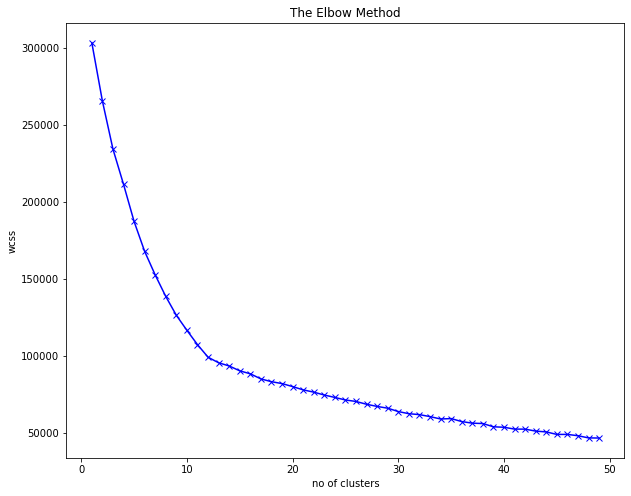

In [10]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 50), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
# Applying K-Means model
optimal_k = 12
model = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10)
model.fit(X)

KMeans(n_clusters=12)

In [12]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()

In [13]:
for i in range(optimal_k):
    print("Cluster %d:" % i),
    for index in order_centroids[i, :10]:
        print(' %s' % terms[index])

Cluster 0:
 environment
 work
 good
 salary
 growth
 culture
 nothing
 company
 job
 working
Cluster 1:
 working
 work
 security
 salary
 nothing
 life
 job
 growth
 good
 environment
Cluster 2:
 nothing
 good
 company
 work
 job
 life
 security
 growth
 working
 salary
Cluster 3:
 work
 good
 company
 growth
 working
 salary
 job
 nothing
 culture
 life
Cluster 4:
 salary
 good
 work
 company
 job
 nothing
 culture
 growth
 environment
 security
Cluster 5:
 good
 company
 work
 salary
 culture
 growth
 environment
 working
 job
 nothing
Cluster 6:
 life
 work
 good
 growth
 salary
 culture
 company
 environment
 nothing
 working
Cluster 7:
 growth
 good
 salary
 company
 work
 nothing
 job
 security
 culture
 life
Cluster 8:
 job
 security
 work
 good
 growth
 salary
 life
 culture
 company
 environment
Cluster 9:
 company
 good
 work
 job
 working
 growth
 culture
 salary
 nothing
 security
Cluster 10:
 culture
 work
 good
 nothing
 company
 growth
 salary
 job
 working
 security
Clu

In [14]:
print("\n")
print("Prediction")
X = tfidf_vectorizer.transform(["Good Place to Work. Lots of opportunities to build yourself and contribute. Benefits and Compensation may differ for the same level."])
predicted = model.predict(X)
print(predicted)



Prediction
[3]
